In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#### file = 'data/run_1/landaudamp1.vp_energy'
run_id = '8'
file_energy = './landaudamp{}/landaudamp{}.vp_energy'.format(run_id,run_id)

file_f1 = './landaudamp{}/landaudamp{}.phase_space.1' .format(run_id,run_id)
file_f2 = './landaudamp{}/landaudamp{}.phase_space.2'.format(run_id,run_id)

file_phi = './landaudamp{}/landaudamp{}.vp_phi'.format(run_id,run_id)

try:
    file_f3 = './landaudamp{}/landaudamp{}.phase_space.3'.format(run_id,run_id)
    data_3 = np.loadtxt(file_f3)
    
    file_f4 = './landaudamp{}/landaudamp{}.phase_space.4'.format(run_id,run_id)
    data_4 = np.loadtxt(file_f4)
except:
    print("No f3")

No f3


nt:9
nv:128
nv:257
No f3


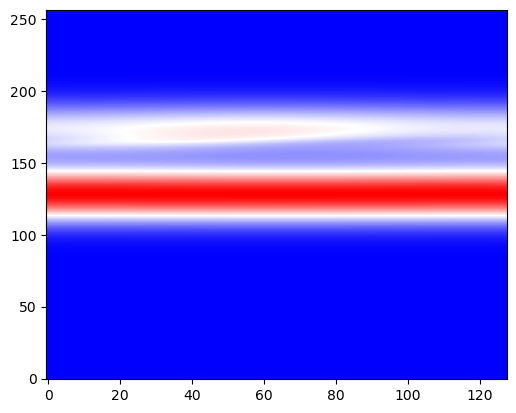

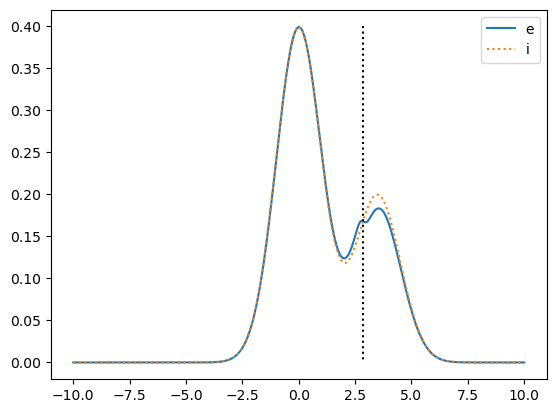

In [14]:
data_1 = np.loadtxt(file_f1)
data_2 = np.loadtxt(file_f2)


## F90 output
##  t,x(j),v(i),fs(ispec,j,i),fs0(ispec,j,i),fsb(ispec,j,i),fsw(ispec,j,i),fsc(ispec,j,i)

t = np.unique(data_1[:,0])
x = np.unique(data_1[:,1])
v = np.unique(data_1[:,2])

# extract dimentions from the data file
nt = len(t)
nx = len(x)
nv = len(v)

print(f"nt:{nt}")
print(f"nv:{nx}")
print(f"nv:{nv}")

f_1 = np.reshape(data_1[:,3],[nv,nx,nt],order='F');
f_2 = np.reshape(data_2[:,3],[nv,nx,nt],order='F');

try:
    f_3 = np.reshape(data_3[:,3],[nv,nx,nt],order='F');
    f_4 = np.reshape(data_4[:,3],[nv,nx,nt],order='F');
except:
    print("No f3")

x = 0
t = 0


plt.figure()
plt.imshow(f_1[:,:,t],origin='lower',cmap='bwr',aspect=0.4)


# look at cut
kL_de = .5
v_phi = 1.43/kL_de
x_lim = .4

plt.figure()
plt.plot(v,f_1[:,x,0],'-',label='e',markevery=.05)
plt.plot(v,f_2[:,x,0],':',label='i',markevery=.05)

plt.plot([v_phi,v_phi],[x_lim,0],':k')

try:
    plt.plot(v,f_3[:,x,0],'-',label='e',markevery=.05)
    plt.plot(v,f_4[:,x,0],'--',label='e',markevery=.05)
except:
    pass

plt.legend()

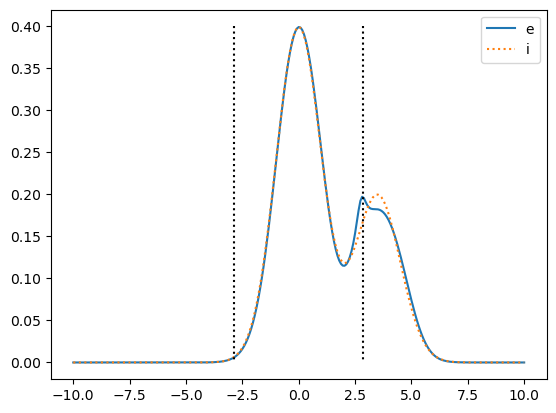

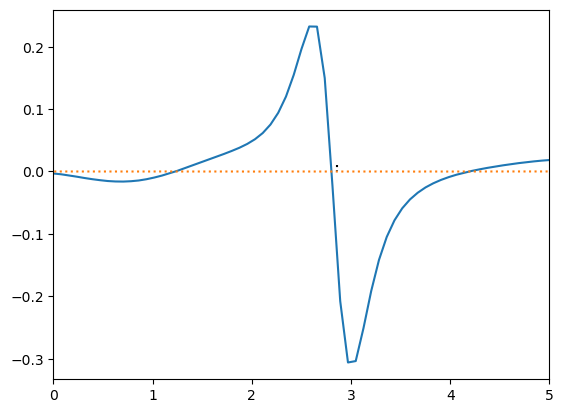

In [4]:

## k*l_de = .5
kL_de = .5



x = 0 
t = 0
# plt.figure()
# plt.plot(v,np.log(f_1[:,x,t]),'-',label='e',markevery=.05)
# plt.plot(v,np.log(f_2[:,x,t]),':',label='i',markevery=.05)
# t= 2
# plt.plot(v,np.log(f_1[:,x,t]),'-',label='e',markevery=.05)
# plt.plot(v,np.log(f_2[:,x,t]),':',label='i',markevery=.05)

plt.figure()
## test
t = 3
plt.plot(v,f_1[:,x,t],'-',label='e',markevery=.05)
plt.plot(v,f_2[:,x,t],':',label='i',markevery=.05)

try:
    plt.plot(v,f_3[:,x,t],'-',label='e',markevery=.05)
    plt.plot(v,f_4[:,x,t],':',label='i',markevery=.05)
except:
    pass

x_lim = .4

v_phi = 1.43/kL_de

plt.plot([v_phi,v_phi],[x_lim,0],':k')
plt.plot([-v_phi,-v_phi],[x_lim,0],':k')
plt.legend()

#plt.ylim([0,0.02])
#plt.xlim([2,4])

#### 
plt.figure()
t = 3
x_lim = .01

plt.plot(v,np.sum(f_1[:,:,t]-f_1[:,:,0],axis=1),'-',label='e',markevery=.05)
plt.plot(v,np.sum(f_2[:,:,t]-f_2[:,:,0],axis=1),':',label='i',markevery=.05)

#v_phi
plt.plot([v_phi,v_phi],[x_lim,0],':k')
plt.plot([-v_phi,-v_phi],[x_lim,0],':k')
plt.xlim([0,5])

try:
    plt.plot(v,f_3[:,x,t]-f_3[:,x,0],'-',label='e',markevery=.05)
    plt.plot(v,f_4[:,x,t]-f_4[:,x,0],':',label='i',markevery=.05)
    plt.plot([v_phi,v_phi],[x_lim,0],':k')

    plt.figure()


    f_e = np.sum(f_1 + f_3,axis=1);
    f_i = np.sum(f_2 + f_4,axis=1);

    plt.plot(v,f_e[:,t]-f_e[:,0])
    plt.plot([v_phi,v_phi],[x_lim,0],':k')
    
    plt.xlim([0,5])
except:
    pass

## $n(x)$ using f

(128, 9)


Text(0.5, 1.0, 'n(x)')

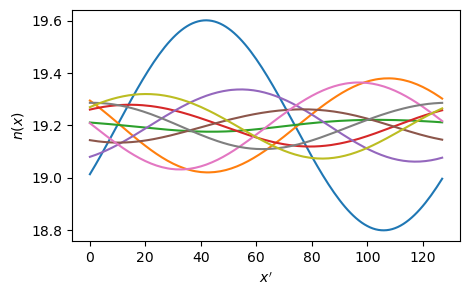

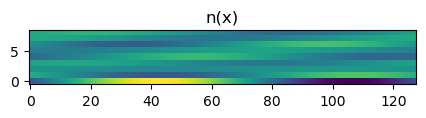

In [5]:
nr_data = np.sum(f_1,axis=0)
nr_data_2 = np.sum(f_2,axis=0)

print(np.shape(nr_data))


plt.figure(figsize=(5,3))

plt.plot(nr_data)


#plt.plot(nr_data_2,':')
plt.xlabel(r'$x^\prime$')
plt.ylabel(r'$n(x)$')

plt.figure(figsize=(5,3))
plt.imshow(np.transpose(nr_data),aspect=2,origin='lower')
#plt.imshow(np.transpose(nr_data_2),':',aspect=2,origin='lower')

plt.title(r'n(x)')

## data $\phi$

In [6]:
data_phi = np.loadtxt(file_phi)

print(np.shape(data_phi))

(5248, 5)


phi shape:(128, 41)


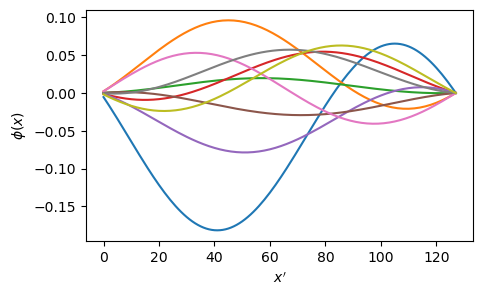

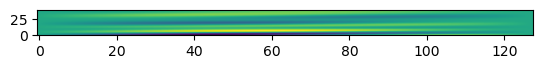

In [7]:
# plt.plot(data_phi[:,0])
# plt.plot(data_phi[:,1])
# plt.xlim([0,2**7-1])

## Phi file data format
## t,x(j),phi(j),rho(j),dphidx(j)

nt_phi = int(len(data_phi)/nx)
phi = np.reshape(data_phi[:,2],[nx,nt_phi],order='F')
rho = np.reshape(data_phi[:,3],[nx,nt_phi],order='F')


plt.figure(figsize=(5,3))
print(f"phi shape:{np.shape(phi)}")

# for i in range(0,10,2):
for i in range(0,np.shape(phi)[1],5):
    plt.plot(phi[:,i],label=str(i))

    
plt.xlabel(r'$x^\prime$')
plt.ylabel(r'$\phi(x)$')

#plt.plot([0,64],[0,0],'k:')
# plt.legend()

plt.figure()
plt.imshow(np.transpose(phi),origin='lower',aspect=64/400)

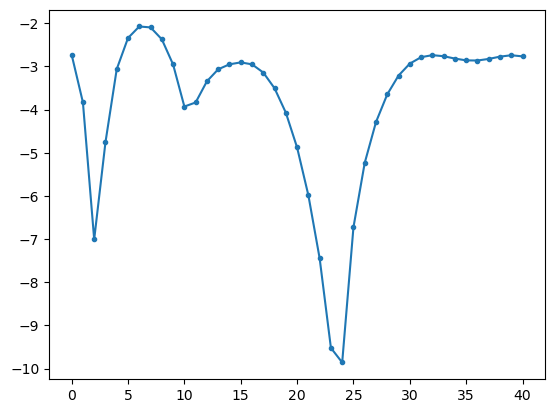

In [8]:
plt.plot(np.log(np.max(phi,axis=0)),'.-')

tt = np.arange(1,150)

# m = -.09
# c = 80
# y = m*tt + c;
# plt.plot(np.log(y))

## Energy plots

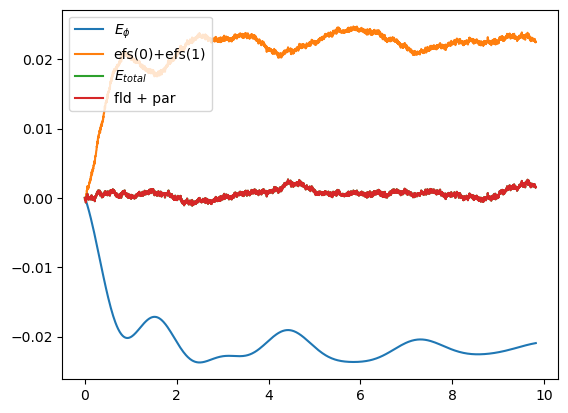

In [9]:
data = np.loadtxt(file_energy)

e_fld = data[:,3]-data[0,3]
t = data[:,1]
plt.plot(t,e_fld,label='$E_\phi$') #ephi

e_part = data[:,4]-data[0,4]+data[:,5]-data[0,5]
e_part = data[:,4]-data[0,4]+data[:,5]-data[0,5]+data[:,6]-data[0,6]+data[:,7]-data[0,7]

plt.plot(t,e_part,label='efs(0)+efs(1)') #efs(0)
# #plt.plot() #efs(1)

plt.plot(t,data[:,2]-data[0,2],label = '$E_{total}$')
plt.plot(t,e_fld+e_part,label = 'fld + par')

## old data with no bump
import scipy as sp

dat = sp.io.loadmat('./exp4_data.mat')
# plt.plot(t,dat['fld'][0,:])
# plt.plot(t,dat['part'][0,:])
# plt.plot(t,dat['total'][0,:])

plt.legend()

In [10]:
# exp_data = {}
# exp_data['fld'] = e_fld
# exp_data['part'] = e_part
# exp_data['total'] = data[:,2]-data[0,2]

# import scipy as sp

# sp.io.savemat('./exp4_data.mat',exp_data)

In [11]:

# print(np.shape(a[2,:]))


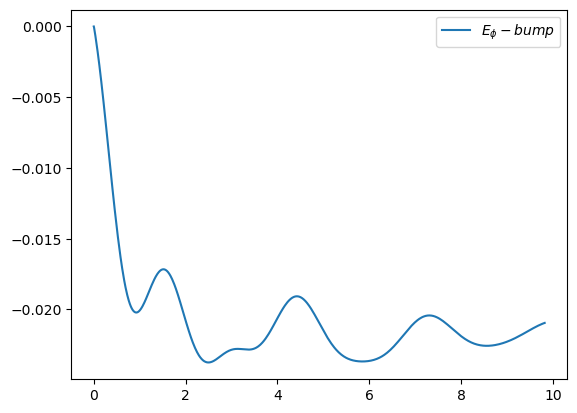

In [12]:
plt.plot(t,e_fld,label='$E_\phi-bump$') #ephi
#plt.plot(t,dat['fld'][0,:],label='$E_\phi$')
plt.legend()

In [13]:
f_e = f_1 + f_3;

plt.figure()
plt.imshow(f_e[:,:,0])


plt.figure()
plt.imshow(np.transpose(f_e[:,:,3]-f_e[:,:,0]),origin='lower')

NameError: name 'f_3' is not defined